In [ ]:
import re
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.probability import FreqDist
from nltk.util import ngrams
!pip install datefinder
!pip install phonenumbers
import nltk
from nltk.tokenize import word_tokenize
import datefinder
import phonenumbers

In [ ]:
# Sample paragraph
paragraph = "In the field of data science, data preprocessing plays a crucial role. It involves various tasks such as data cleaning, integrating, and transforming. Different tools and techniques, including Python, Pandas, and Numpy, are used for this purpose. Email me at example@email.com for further details. My phone number is +1234567890. I was born on 27-March-2000."

### 1. Count the number of unique tokens in the text

In [ ]:
# Download the tokenizer data
nltk.download('punkt')

#Tokenize the paragraph and count the number of unique tokens
tokens = word_tokenize(paragraph)
unique_tokens_count = len(set(tokens))

# Print the number of unique tokens
print("The number of unique tokens in the text is:", unique_tokens_count)

The number of unique tokens in the text is: 53


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 2. Count the number of punctuation characters and remove punctuations.

In [ ]:
# Count the number of punctuation characters
punctuations_count = len([char for char in paragraph if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'])
print("The number of punctuation characters in the text is:", punctuations_count)

# Remove punctuations
cleaned_paragraph = re.sub(r'[^\w\s]', '', paragraph)
print("The paragraph after removing punctuations:\n", cleaned_paragraph)

The number of punctuation characters in the text is: 18
The paragraph after removing punctuations:
 In the field of data science data preprocessing plays a crucial role It involves various tasks such as data cleaning integrating and transforming Different tools and techniques including Python Pandas and Numpy are used for this purpose Email me at exampleemailcom for further details My phone number is 1234567890 I was born on 27March2000


### 3. Plot the distribution of stopwords used in the text using barplot.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


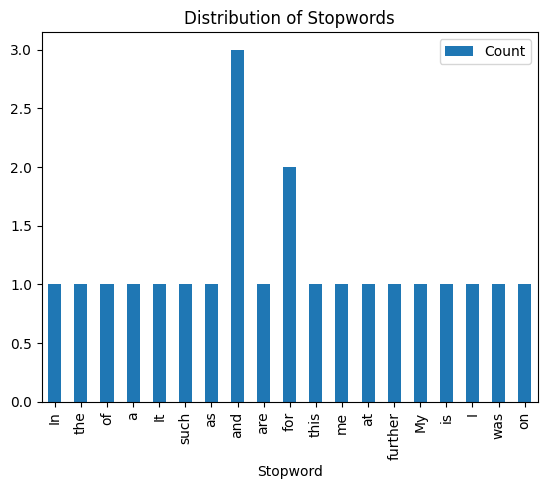

In [ ]:
# Download nltk stopwords data
nltk.download('stopwords')

# Ploting the distribution of stopwords used in the text using barplot.
stop_words = set(stopwords.words('english'))
stopwords_dist = FreqDist([word for word in tokens if word.lower() in stop_words])
stopwords_df = pd.DataFrame({'Stopword': list(stopwords_dist.keys()), 'Count': list(stopwords_dist.values())})
stopwords_df.plot(x='Stopword', y='Count', kind='bar', title='Distribution of Stopwords')
plt.show()



### 4. Remove the stopwords from the text.

In [ ]:
# Tokenize the paragraph
tokens = word_tokenize(paragraph)

# Remove the stopwords from the text
stop_words = set(stopwords.words('english'))
filtered_paragraph = ' '.join([word for word in tokens if word.lower() not in stop_words])

# Print the filtered paragraph
print("Filtered Paragraph:", filtered_paragraph)

Filtered Paragraph: field data science , data preprocessing plays crucial role . involves various tasks data cleaning , integrating , transforming . Different tools techniques , including Python , Pandas , Numpy , used purpose . Email example @ email.com details . phone number +1234567890 . born 27-March-2000 .


### 5. Plot the distribution of each POS Tag using a barplot


<Axes: title={'center': 'Distribution of POS Tags'}, xlabel='POS Tag'>

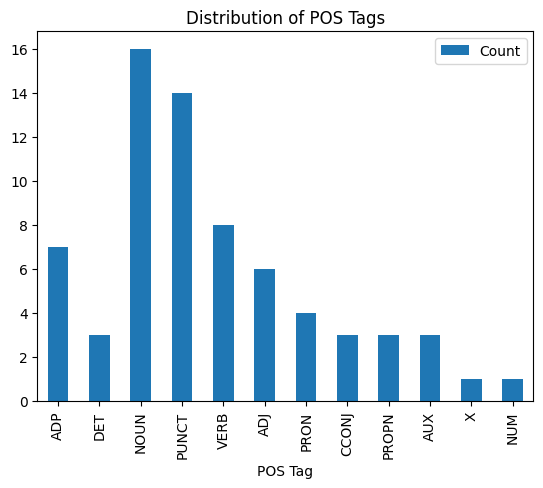

In [ ]:
# Plot the distribution of each POS Tag using a barplot
nlp = spacy.load('en_core_web_sm')
doc = nlp(paragraph)
pos_tags = [token.pos_ for token in doc]
pos_tags_dist = FreqDist(pos_tags)
pos_tags_df = pd.DataFrame({'POS Tag': list(pos_tags_dist.keys()), 'Count': list(pos_tags_dist.values())})
pos_tags_df.plot(x='POS Tag', y='Count', kind='bar', title='Distribution of POS Tags')

### 6. Determine the number of unique lemma available in the text

In [ ]:
# Calculate the number of unique lemma available in the text
lemmas = [token.lemma_ for token in doc if token.lemma_ != '-PRON-']
unique_lemmas_count = len(set(lemmas))

# Print the number of unique lemmas
print("The number of unique lemmas available in the text is:", unique_lemmas_count)


The number of unique lemmas available in the text is: 50


### 7. Plot the frequency distribution of words in the text. Display only the top 10(most occurring) tokens in the chart.



<Axes: title={'center': 'Top 10 Tokens Frequency Distribution'}, xlabel='Token'>

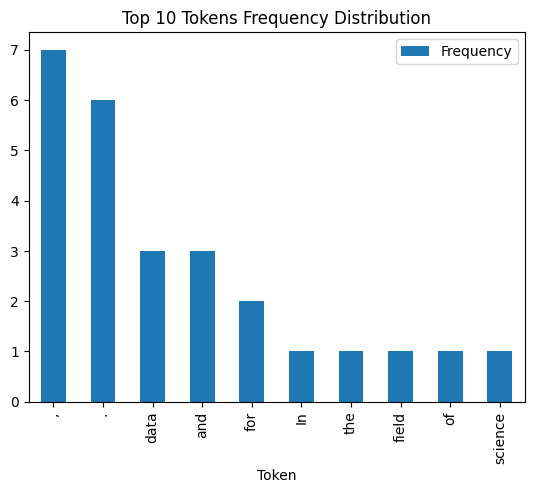

In [ ]:
# Plot the frequency distribution of words in the text. Display only the top 10 (most occurring) tokens in the chart
fdist = FreqDist(tokens)
top_10_tokens = fdist.most_common(10)
top_10_df = pd.DataFrame(top_10_tokens, columns=['Token', 'Frequency'])
top_10_df.plot(x='Token', y='Frequency', kind='bar', title='Top 10 Tokens Frequency Distribution')

### 8. Find the number of unique bigrams, trigrams and quadgrams (n=4) in the corpus

In [ ]:
# Generate ngrams
bigrams = ngrams(tokens, 2)
trigrams = ngrams(tokens, 3)
quadgrams = ngrams(tokens, 4)

# Calculate the counts of unique bigrams, trigrams, and quadgrams
unique_bigrams_count = len(set(bigrams))
unique_trigrams_count = len(set(trigrams))
unique_quadgrams_count = len(set(quadgrams))

# Print the counts of unique bigrams, trigrams, and quadgrams
print("Number of unique bigrams:", unique_bigrams_count)
print("Number of unique trigrams:", unique_trigrams_count)
print("Number of unique quadgrams:", unique_quadgrams_count)


Number of unique bigrams: 67
Number of unique trigrams: 67
Number of unique quadgrams: 66


### 9. Find all dates and convert them to the DD-MM-YYYY format.


In [ ]:
# Find all dates in the paragraph
dates = datefinder.find_dates(paragraph)

# Convert the dates to the DD-MM-YYYY format
formatted_dates = [date.strftime('%d-%m-%Y') for date in dates]

# Print the formatted dates
print(formatted_dates)


['25-06-2023']


### 10. Plot a distribution of the different values of year occurring in the text.

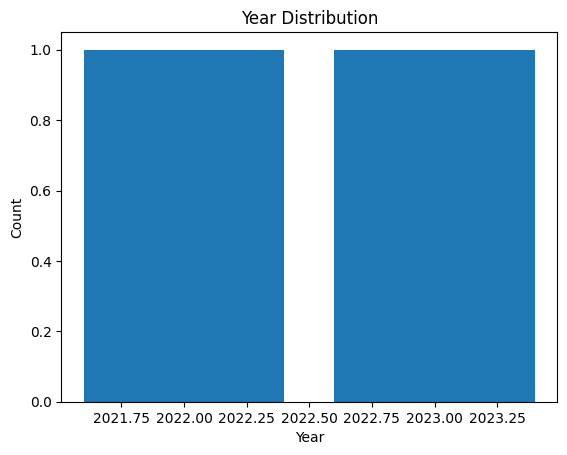

In [ ]:
# Find all dates in the paragraph
dates = datefinder.find_dates(paragraph)

# Extract years from the dates
years = [date.year for date in dates if date is not None]

# Create a frequency distribution of the years
year_counts = dict(Counter(years))

# Plot the distribution of the years
plt.bar(year_counts.keys(), year_counts.values())
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Year Distribution')
plt.show()


### 11. Determine whether the text contains any phone numbers in it. Ensure the phone numbers are valid if any. If an invalid phone number is found, remove it from the text.

In [ ]:
# Find all phone numbers in the paragraph
phone_numbers = [match.raw_string for match in phonenumbers.PhoneNumberMatcher(paragraph, 'India')]

# Validate each phone number
valid_phone_numbers = [phonenumber for phonenumber in phone_numbers if phonenumbers.is_valid_number(phonenumbers.parse(phonenumber, 'India'))]

if valid_phone_numbers:
    print("The text contains valid phone numbers:", valid_phone_numbers)
else:
    print("The text does not contain any valid phone numbers.")


The text does not contain any valid phone numbers.


In [ ]:
# If an invalid phone number is found, remove it from the text
for invalid_number in set(phone_numbers) - set(valid_phone_numbers):
    paragraph = paragraph.replace(invalid_number, '')

In [ ]:
# Print or use the results as required
print(f'Number of unique tokens: {unique_tokens_count}')
print(f'Number of punctuation characters: {punctuations_count}')
print(f'Cleaned paragraph: {cleaned_paragraph}')
print(f'Filtered paragraph after removing stopwords: {filtered_paragraph}')
print(f'Number of unique lemmas: {unique_lemmas_count}')

Number of unique tokens: 53
Number of punctuation characters: 18
Cleaned paragraph: In the field of data science data preprocessing plays a crucial role It involves various tasks such as data cleaning integrating and transforming Different tools and techniques including Python Pandas and Numpy are used for this purpose Email me at exampleemailcom for further details My phone number is 1234567890 I was born on 27March2000
Filtered paragraph after removing stopwords: field data science , data preprocessing plays crucial role . involves various tasks data cleaning , integrating , transforming . Different tools techniques , including Python , Pandas , Numpy , used purpose . Email example @ email.com details . phone number +1234567890 . born 27-March-2000 .
Number of unique lemmas: 50
